In [ ]:
# Import the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from google.colab import files

# Enable inline plotting for matplotlib
%matplotlib inline

# Step 1: Upload the Dataset
print("Please upload your housing.csv file.")
uploaded = files.upload()
for filename in uploaded.keys():
    print(f"Uploaded file: {filename}")
    data = pd.read_csv(filename)

Please upload your housing.csv file.


Saving housing.csv to housing.csv
Uploaded file: housing.csv


In [ ]:
print(data.head())

   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY  


In [ ]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB
None


In [ ]:
print(data.isnull().sum())

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64


In [ ]:
imputer = SimpleImputer(strategy='median')
data['total_bedrooms'] = imputer.fit_transform(data[['total_bedrooms']])

In [ ]:
print(data.isnull().sum())

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64


In [ ]:
print(data.tail())

       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
20635    -121.09     39.48                25.0       1665.0           374.0   
20636    -121.21     39.49                18.0        697.0           150.0   
20637    -121.22     39.43                17.0       2254.0           485.0   
20638    -121.32     39.43                18.0       1860.0           409.0   
20639    -121.24     39.37                16.0       2785.0           616.0   

       population  households  median_income  median_house_value  \
20635       845.0       330.0         1.5603             78100.0   
20636       356.0       114.0         2.5568             77100.0   
20637      1007.0       433.0         1.7000             92300.0   
20638       741.0       349.0         1.8672             84700.0   
20639      1387.0       530.0         2.3886             89400.0   

      ocean_proximity  
20635          INLAND  
20636          INLAND  
20637          INLAND  
20638          INLAN

In [ ]:
from sklearn.datasets import fetch_california_housing
import pandas as pd

# Load the California Housing dataset
data = fetch_california_housing(as_frame=True)
housing = data.frame

# Display basic information about the dataset
print(housing.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB
None


In [ ]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeRegressor

# Create new features based on existing columns (like before)
housing['RoomsPerHousehold'] = housing['AveRooms'] / housing['AveOccup']
housing['BedroomsPerRoom'] = housing['AveBedrms'] / housing['AveRooms']
housing['PopulationPerHousehold'] = housing['Population'] / housing['AveOccup']

# Bucket the new features into categories using pandas.cut()
# You can adjust the number of bins depending on your data

# Bucket 'RoomsPerHousehold' into categories
housing['RoomsPerHousehold_Bucket'] = pd.cut(housing['RoomsPerHousehold'], bins=5, labels=['Low', 'Medium-Low', 'Medium', 'Medium-High', 'High'])

# Bucket 'BedroomsPerRoom' into categories
housing['BedroomsPerRoom_Bucket'] = pd.cut(housing['BedroomsPerRoom'], bins=5, labels=['Low', 'Medium-Low', 'Medium', 'Medium-High', 'High'])

# Bucket 'PopulationPerHousehold' into categories
housing['PopulationPerHousehold_Bucket'] = pd.cut(housing['PopulationPerHousehold'], bins=5, labels=['Low', 'Medium-Low', 'Medium', 'Medium-High', 'High'])

# Display the first few rows to check the bucketing
print(housing[['RoomsPerHousehold', 'RoomsPerHousehold_Bucket',
               'BedroomsPerRoom', 'BedroomsPerRoom_Bucket',
               'PopulationPerHousehold', 'PopulationPerHousehold_Bucket']].head())

# Optionally, check the value counts of the categories to see how the data is distributed
print(housing['RoomsPerHousehold_Bucket'].value_counts())
print(housing['BedroomsPerRoom_Bucket'].value_counts())
print(housing['PopulationPerHousehold_Bucket'].value_counts())

# Save the modified housing DataFrame to a CSV file
housing.to_csv('modified_housing_data.csv', index=False)

# Confirm the file has been saved
print("Data saved to 'modified_housing_data.csv'")



   RoomsPerHousehold RoomsPerHousehold_Bucket  BedroomsPerRoom  \
0           2.732919                      Low         0.146591   
1           2.956685                      Low         0.155797   
2           2.957661                      Low         0.129516   
3           2.283154                      Low         0.184458   
4           2.879646                      Low         0.172096   

  BedroomsPerRoom_Bucket  PopulationPerHousehold PopulationPerHousehold_Bucket  
0                    Low                   126.0                           Low  
1                    Low                  1138.0                           Low  
2                    Low                   177.0                           Low  
3                    Low                   219.0                           Low  
4                    Low                   259.0                           Low  
RoomsPerHousehold_Bucket
Low            20600
Medium-Low        30
Medium             5
Medium-High        3
High    

In [ ]:
# Load the saved CSV file into a DataFrame
modified_housing_data = pd.read_csv('modified_housing_data.csv')

# Print the first few rows of the DataFrame
print(modified_housing_data.head())


   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  MedHouseVal  RoomsPerHousehold  BedroomsPerRoom  \
0    -122.23        4.526           2.732919         0.146591   
1    -122.22        3.585           2.956685         0.155797   
2    -122.24        3.521           2.957661         0.129516   
3    -122.25        3.413           2.283154         0.184458   
4    -122.25        3.422           2.879646         0.172096   

   PopulationPerHousehold RoomsPerHousehold_Bucket BedroomsPerRoom_Bucket  \
0                   126.0                      Low                    Low  

<ipython-input-10-766ab54b2c84>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=feature, data=modified_housing_data, ax=axes[i], palette="viridis")
<ipython-input-10-766ab54b2c84>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=feature, data=modified_housing_data, ax=axes[i], palette="viridis")
<ipython-input-10-766ab54b2c84>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=feature, data=modified_housing_data, ax=axes[i], palette="viridis")


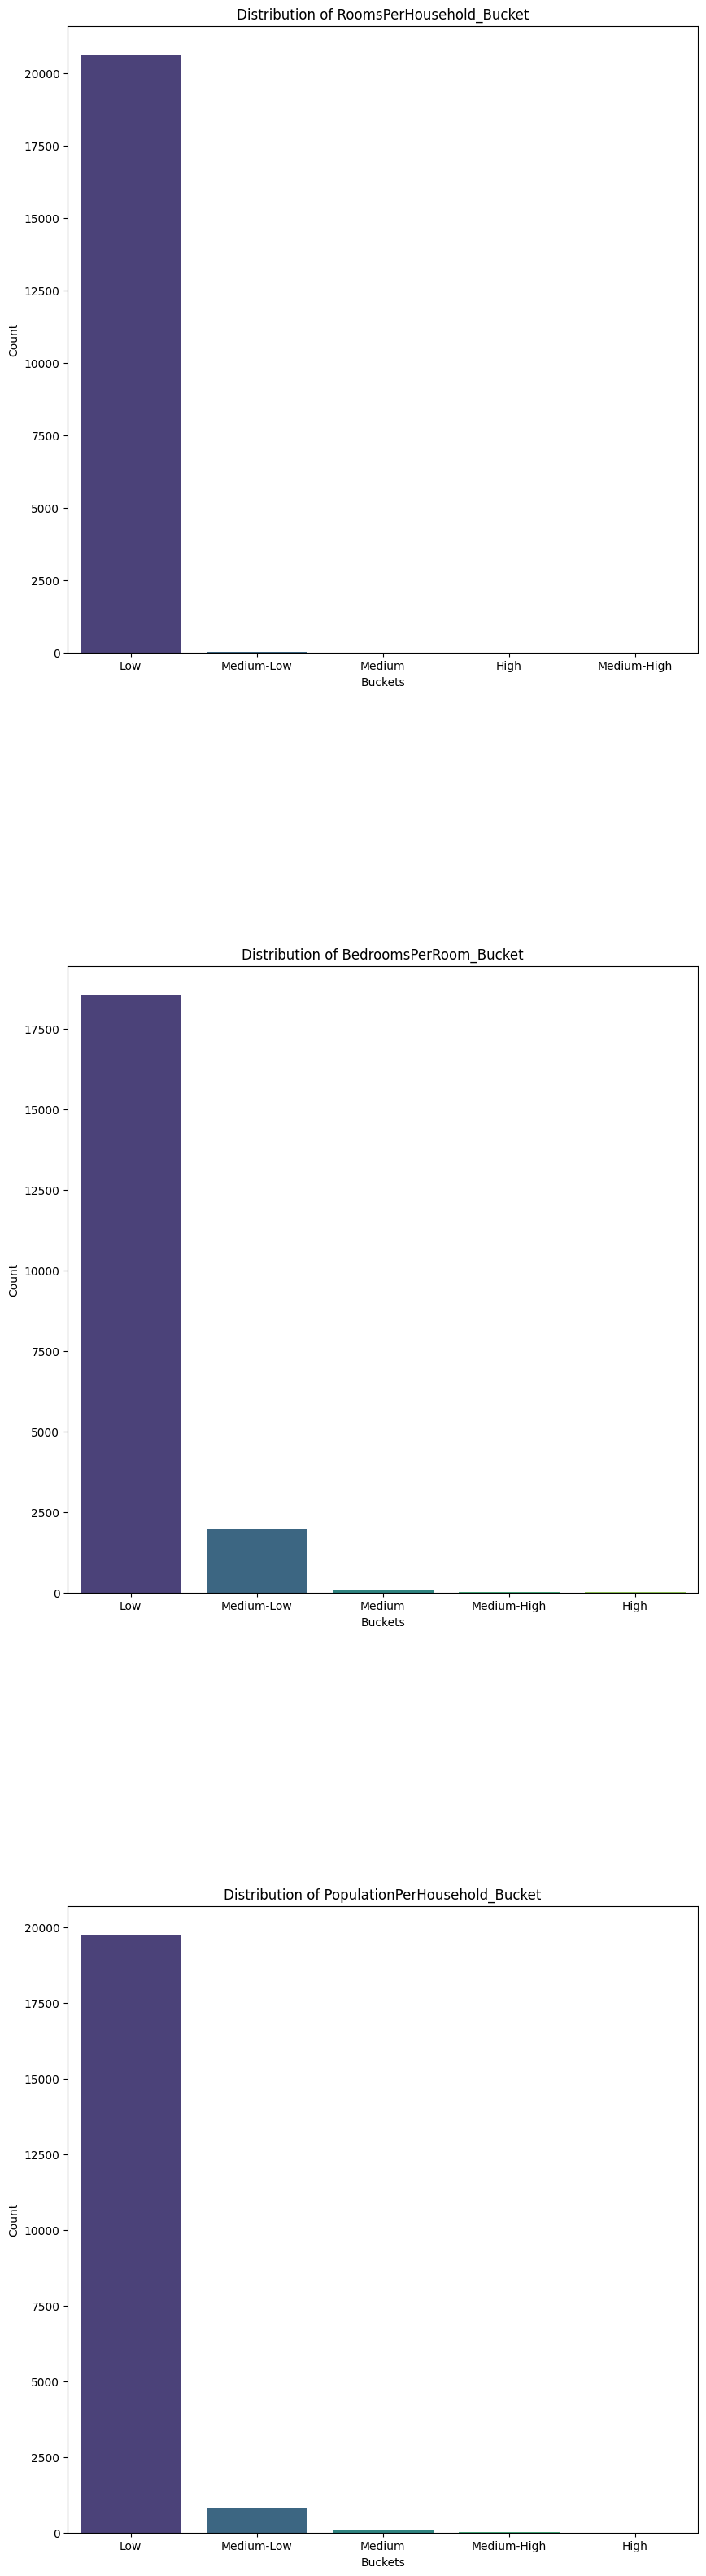

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming `modified_housing_data` has the bucketed features like 'RoomsPerHousehold_Bucket', etc.
bucketed_features = ['RoomsPerHousehold_Bucket', 'BedroomsPerRoom_Bucket', 'PopulationPerHousehold_Bucket']

# Create subplots for each bucketed feature
fig, axes = plt.subplots(nrows=len(bucketed_features), ncols=1, figsize=(10, 40))
fig.subplots_adjust(hspace=0.5)

# Loop through the bucketed features to create the countplots
for i, feature in enumerate(bucketed_features):
    sns.countplot(x=feature, data=modified_housing_data, ax=axes[i], palette="viridis")
    axes[i].set_title(f"Distribution of {feature}")
    axes[i].set_xlabel("Buckets")
    axes[i].set_ylabel("Count")

# Show the plots
plt.show()


In [ ]:
print(modified_housing_data.isnull().sum())

MedInc                           0
HouseAge                         0
AveRooms                         0
AveBedrms                        0
Population                       0
AveOccup                         0
Latitude                         0
Longitude                        0
MedHouseVal                      0
RoomsPerHousehold                0
BedroomsPerRoom                  0
PopulationPerHousehold           0
RoomsPerHousehold_Bucket         0
BedroomsPerRoom_Bucket           0
PopulationPerHousehold_Bucket    0
dtype: int64


In [ ]:
# Check correlations of new features with target variable
# Assuming you have already created the 'housing' DataFrame with new features
# Compute the correlation matrix for numerical columns only
numeric_cols = modified_housing_data.select_dtypes(include=[np.number]).columns  # Select only numeric columns
new_corr_matrix = modified_housing_data[numeric_cols].corr()

# Print the correlation of numerical features with the target variable
print(new_corr_matrix['MedHouseVal'].sort_values(ascending=False))



MedHouseVal               1.000000
MedInc                    0.688075
RoomsPerHousehold         0.209482
AveRooms                  0.151948
HouseAge                  0.105623
PopulationPerHousehold    0.065843
AveOccup                 -0.023737
Population               -0.024650
Longitude                -0.045967
AveBedrms                -0.046701
Latitude                 -0.144160
BedroomsPerRoom          -0.255624
Name: MedHouseVal, dtype: float64


In [ ]:
import pandas as pd
print(modified_housing_data.describe())


             MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   1132.462122   
min        0.499900      1.000000      0.846154      0.333333      3.000000   
25%        2.563400     18.000000      4.440716      1.006079    787.000000   
50%        3.534800     29.000000      5.229129      1.048780   1166.000000   
75%        4.743250     37.000000      6.052381      1.099526   1725.000000   
max       15.000100     52.000000    141.909091     34.066667  35682.000000   

           AveOccup      Latitude     Longitude   MedHouseVal  \
count  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.070655     35.631861   -119.569704      2.068558   
std       10.386050      2.135952      2.003532      1.153956   
min        0.692308     32.5

In [ ]:
print(modified_housing_data.dtypes)

MedInc                           float64
HouseAge                         float64
AveRooms                         float64
AveBedrms                        float64
Population                       float64
AveOccup                         float64
Latitude                         float64
Longitude                        float64
MedHouseVal                      float64
RoomsPerHousehold                float64
BedroomsPerRoom                  float64
PopulationPerHousehold           float64
RoomsPerHousehold_Bucket          object
BedroomsPerRoom_Bucket            object
PopulationPerHousehold_Bucket     object
dtype: object


In [ ]:
import numpy as np
import pandas as pd
from scipy import stats

# Assuming 'modified_housing_data' is your DataFrame after adding new features and bucketing

# Step 1: Identifying Outliers using Z-Score Method
# For identifying outliers, we will only use numeric columns
numeric_columns = modified_housing_data.select_dtypes(include=[np.number]).columns
z_scores = np.abs(stats.zscore(modified_housing_data[numeric_columns]))  # Calculate z-scores for numeric columns
outliers_zscore = (z_scores > 3).all(axis=1)  # Consider data points with z-score > 3 as outliers

# Step 2: Identifying Outliers using IQR Method
Q1 = modified_housing_data[numeric_columns].quantile(0.25)
Q3 = modified_housing_data[numeric_columns].quantile(0.75)
IQR = Q3 - Q1
outliers_iqr = ((modified_housing_data[numeric_columns] < (Q1 - 1.5 * IQR)) |
                (modified_housing_data[numeric_columns] > (Q3 + 1.5 * IQR)))

# Step 3: Handling Outliers
# Option 1: Removing outliers
modified_housing_no_outliers = modified_housing_data[~outliers_zscore]  # Remove rows that are outliers based on Z-score
modified_housing_no_outliers = modified_housing_no_outliers[~outliers_iqr.any(axis=1)]  # Remove rows that are outliers based on IQR

# Option 2: Winsorizing (Capping outliers to the 1st and 3rd quartiles)
modified_housing_winsorized = modified_housing_data.copy()
modified_housing_winsorized[numeric_columns] = modified_housing_winsorized[numeric_columns].clip(lower=Q1 - 1.5 * IQR, upper=Q3 + 1.5 * IQR, axis=1)

# Option 3: Log Transformation (useful for highly skewed data, like 'MedHouseVal')
modified_housing_transformed = modified_housing_data.copy()
modified_housing_transformed['MedHouseVal'] = np.log1p(modified_housing_transformed['MedHouseVal'])  # Example transformation

# Display the result of outlier handling
print("Original Data:")
print(modified_housing_data.describe())

print("\nData after Removing Outliers:")
print(modified_housing_no_outliers.describe())

print("\nData after Winsorizing Outliers:")
print(modified_housing_winsorized.describe())

print("\nData after Log Transformation (for skewed data):")
print(modified_housing_transformed.describe())


Original Data:
             MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   1132.462122   
min        0.499900      1.000000      0.846154      0.333333      3.000000   
25%        2.563400     18.000000      4.440716      1.006079    787.000000   
50%        3.534800     29.000000      5.229129      1.048780   1166.000000   
75%        4.743250     37.000000      6.052381      1.099526   1725.000000   
max       15.000100     52.000000    141.909091     34.066667  35682.000000   

           AveOccup      Latitude     Longitude   MedHouseVal  \
count  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.070655     35.631861   -119.569704      2.068558   
std       10.386050      2.135952      2.003532      1.153956   
min        0.

In [ ]:
from sklearn.preprocessing import StandardScaler

# Instantiate the scaler
scaler = StandardScaler()

# List of numeric features to standardize
numeric_features = ['AveRooms', 'AveOccup', 'AveBedrms', 'Population', 'MedInc', 'MedHouseVal']

# Check that all columns in numeric_features exist in the DataFrame
missing_features = [feature for feature in numeric_features if feature not in modified_housing_data.columns]
if missing_features:
    print(f"Warning: The following features are missing in the DataFrame: {missing_features}")
else:
    # Standardize the numeric features
    modified_housing_data[numeric_features] = scaler.fit_transform(modified_housing_data[numeric_features])

# Print the first few rows of the modified dataset
print(modified_housing_data.head())


     MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  2.344766      41.0  0.628559  -0.153758   -0.974429 -0.049597     37.88   
1  2.332238      21.0  0.327041  -0.263336    0.861439 -0.092512     37.86   
2  1.782699      52.0  1.155620  -0.049016   -0.820777 -0.025843     37.85   
3  0.932968      52.0  0.156966  -0.049833   -0.766028 -0.050329     37.85   
4 -0.012881      52.0  0.344711  -0.032906   -0.759847 -0.085616     37.85   

   Longitude  MedHouseVal  RoomsPerHousehold  BedroomsPerRoom  \
0    -122.23     2.129631           2.732919         0.146591   
1    -122.22     1.314156           2.956685         0.155797   
2    -122.24     1.258693           2.957661         0.129516   
3    -122.25     1.165100           2.283154         0.184458   
4    -122.25     1.172900           2.879646         0.172096   

   PopulationPerHousehold RoomsPerHousehold_Bucket BedroomsPerRoom_Bucket  \
0                   126.0                      Low             

                                 MedInc  HouseAge  AveRooms  AveBedrms  \
MedInc                         1.000000 -0.119034  0.326895  -0.062040   
HouseAge                      -0.119034  1.000000 -0.153277  -0.077747   
AveRooms                       0.326895 -0.153277  1.000000   0.847621   
AveBedrms                     -0.062040 -0.077747  0.847621   1.000000   
Population                     0.004834 -0.296244 -0.072213  -0.066197   
AveOccup                       0.018766  0.013191 -0.004852  -0.006181   
Latitude                      -0.079809  0.011173  0.106389   0.069721   
Longitude                     -0.015176 -0.108197 -0.027540   0.013344   
MedHouseVal                    0.688075  0.105623  0.151948  -0.046701   
RoomsPerHousehold              0.237828 -0.107926  0.887282   0.824678   
BedroomsPerRoom               -0.615479  0.136367 -0.418704   0.055817   
PopulationPerHousehold         0.013033 -0.302916 -0.080598  -0.054833   
RoomsPerHousehold_Bucket      -0.01180

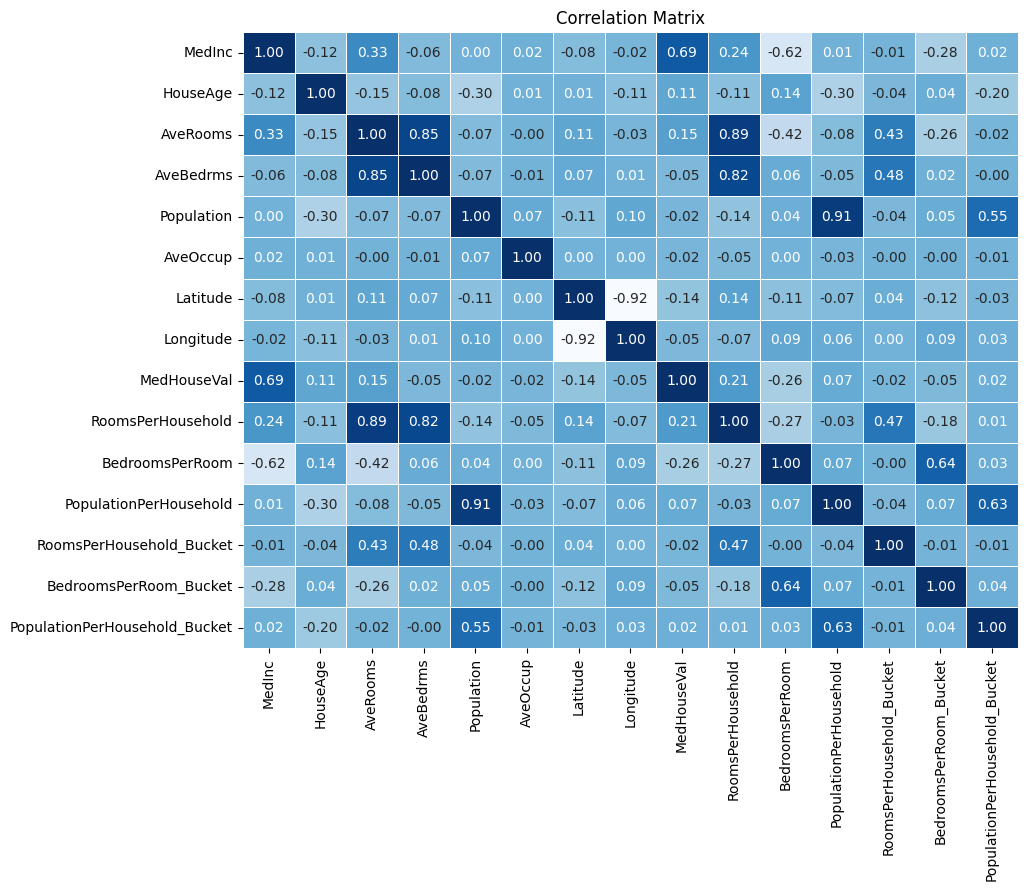

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder instance
label_encoder = LabelEncoder()

# Convert categorical columns to numerical values
categorical_columns = ['RoomsPerHousehold_Bucket', 'BedroomsPerRoom_Bucket', 'PopulationPerHousehold_Bucket']
for col in categorical_columns:
    modified_housing_data[col] = label_encoder.fit_transform(modified_housing_data[col])

# Compute the correlation matrix for the entire dataset (including categorical features converted to numeric)
corr_matrix = modified_housing_data.corr()

# Print the correlation matrix
print(corr_matrix)

# Visualize the correlation matrix without color
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', linewidths=0.5, cbar=False, cmap='Blues')
plt.title("Correlation Matrix")
plt.show()


In [ ]:
print(modified_housing_data.head())

     MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  2.344766      41.0  0.628559  -0.153758   -0.974429 -0.049597     37.88   
1  2.332238      21.0  0.327041  -0.263336    0.861439 -0.092512     37.86   
2  1.782699      52.0  1.155620  -0.049016   -0.820777 -0.025843     37.85   
3  0.932968      52.0  0.156966  -0.049833   -0.766028 -0.050329     37.85   
4 -0.012881      52.0  0.344711  -0.032906   -0.759847 -0.085616     37.85   

   Longitude  MedHouseVal  RoomsPerHousehold  BedroomsPerRoom  \
0    -122.23     2.129631           2.732919         0.146591   
1    -122.22     1.314156           2.956685         0.155797   
2    -122.24     1.258693           2.957661         0.129516   
3    -122.25     1.165100           2.283154         0.184458   
4    -122.25     1.172900           2.879646         0.172096   

   PopulationPerHousehold  RoomsPerHousehold_Bucket  BedroomsPerRoom_Bucket  \
0                   126.0                         1          

<Figure size 640x480 with 0 Axes>

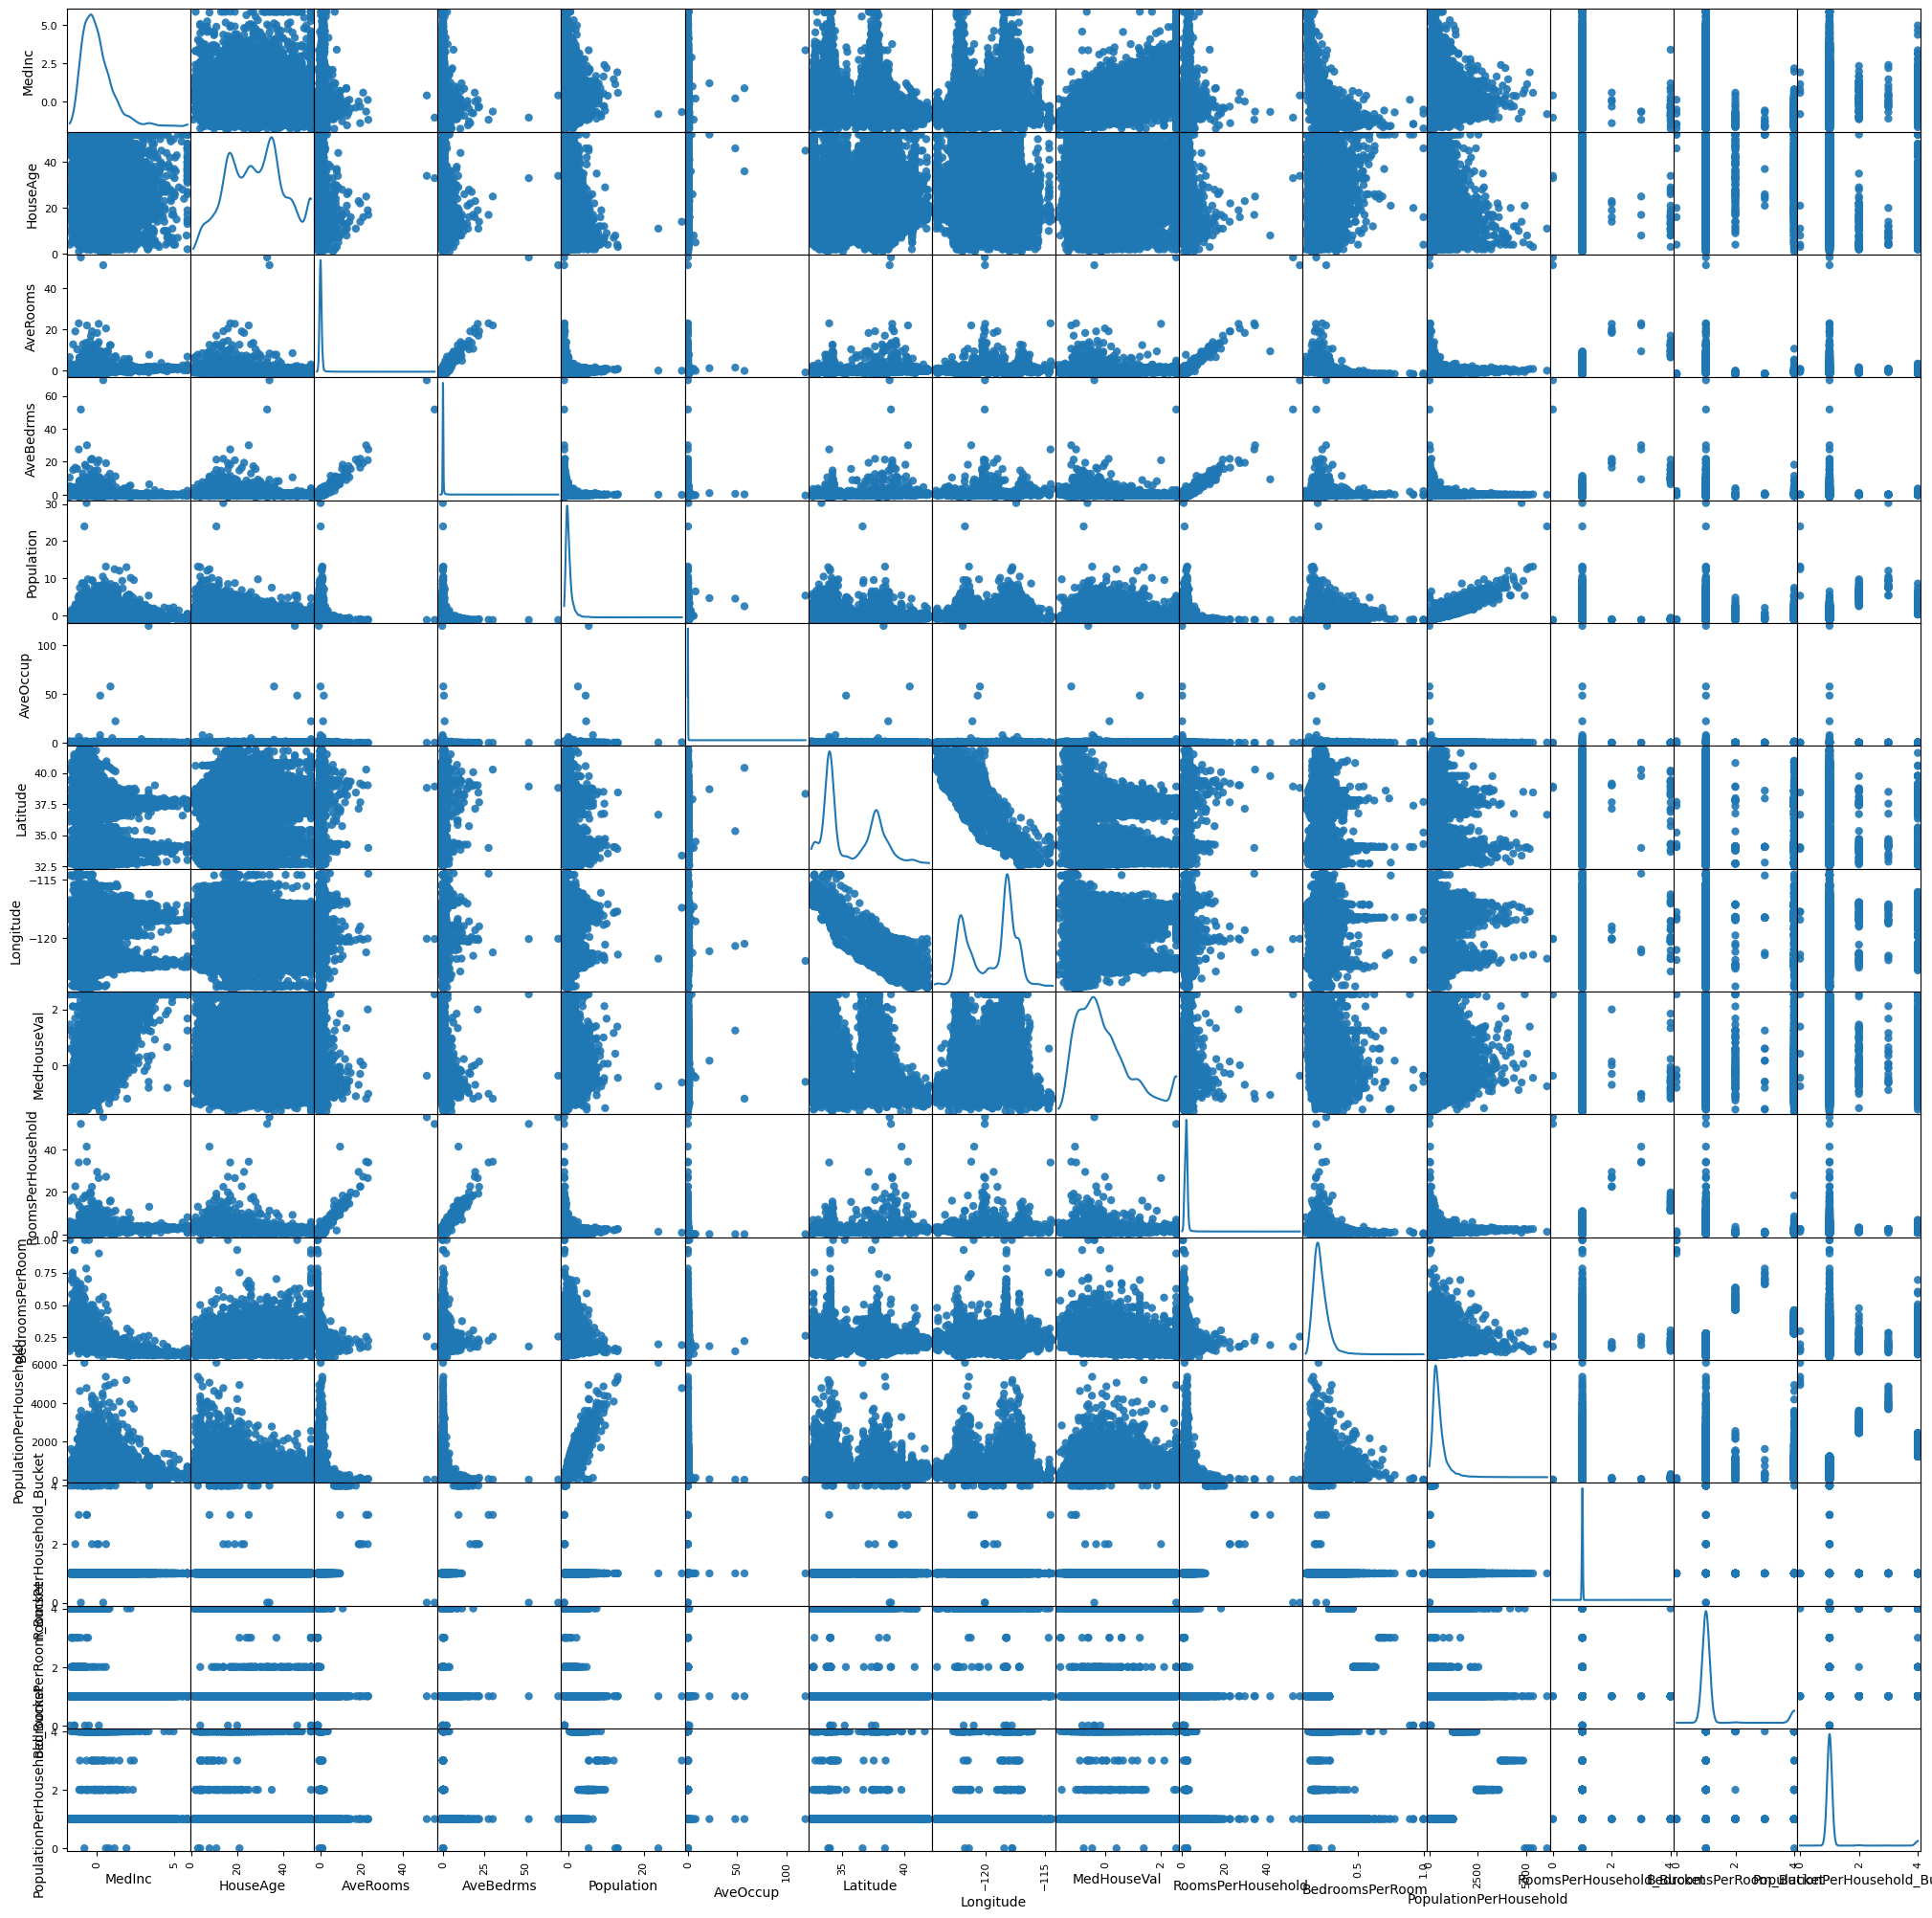

In [ ]:
#display scatter_matrix also
fig = plt.figure()
scatter_matrix(modified_housing_data,figsize =(25,25),alpha=0.9,diagonal="kde",marker="o");


Linear Regression MAE: 0.4220250218124392
Linear Regression MSE: 0.3415925266664133
Linear Regression RMSE: 0.5844591745078636
Linear Regression R-squared (R²): 0.6528964323802515


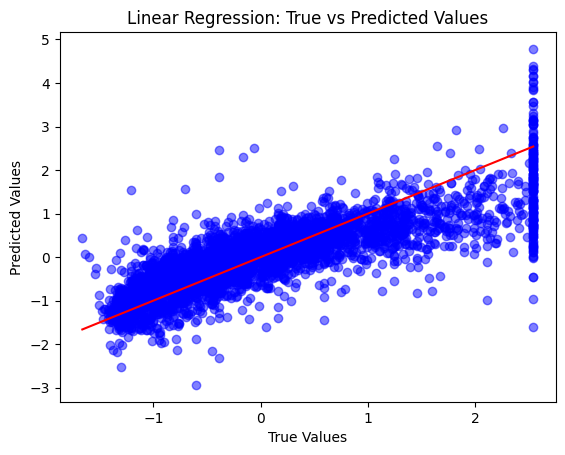

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import matplotlib.pyplot as plt

# Assuming you have already loaded and processed the 'modified_housing_data' DataFrame
# Split the data into features (X) and target variable (y)
X = modified_housing_data.drop('MedHouseVal', axis=1)  # 'MedHouseVal' is the target variable
y = modified_housing_data['MedHouseVal']

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the Linear Regression model
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

# Make predictions on the test set
y_pred_lin = lin_reg.predict(X_test)

# Evaluate the model's performance
mae = metrics.mean_absolute_error(y_test, y_pred_lin)
mse = metrics.mean_squared_error(y_test, y_pred_lin)
rmse = np.sqrt(mse)
r2 = metrics.r2_score(y_test, y_pred_lin)  # R-squared error

# Print the evaluation metrics
print("Linear Regression MAE:", mae)
print("Linear Regression MSE:", mse)
print("Linear Regression RMSE:", rmse)
print("Linear Regression R-squared (R²):", r2)

# Optional: Visualize the true vs predicted values
plt.scatter(y_test, y_pred_lin, alpha=0.5, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')  # Line of perfect prediction
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('Linear Regression: True vs Predicted Values')
plt.show()


In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
import pickle  # To load the model, scaler, and encoder

# Load the trained model, scaler, and label encoder (adjust paths if necessary)
# model = pickle.load(open('trained_model.pkl', 'rb'))
# scaler = pickle.load(open('scaler.pkl', 'rb'))
# label_encoder = pickle.load(open('label_encoder.pkl', 'rb'))

# Function to bucketize numeric variables
def add_bucketed_features(data):
    data['RoomsPerHousehold'] = data['TotalRooms'] / data['Households']
    data['BedroomsPerRoom'] = data['TotalBedrooms'] / data['TotalRooms']
    data['PopulationPerHousehold'] = data['Population'] / data['Households']

    # Create buckets for the computed features
    data['RoomsPerHousehold_Bucket'] = pd.cut(data['RoomsPerHousehold'], bins=5, labels=['Low', 'Medium-Low', 'Medium', 'Medium-High', 'High'])
    data['BedroomsPerRoom_Bucket'] = pd.cut(data['BedroomsPerRoom'], bins=5, labels=['Low', 'Medium-Low', 'Medium', 'Medium-High', 'High'])
    data['PopulationPerHousehold_Bucket'] = pd.cut(data['PopulationPerHousehold'], bins=5, labels=['Low', 'Medium-Low', 'Medium', 'Medium-High', 'High'])
    return data

# Preprocessing function to handle the input for prediction
def preprocess_input(data, label_encoder, scaler):
    # Encode the categorical feature (OceanProximity)
    data['OceanProximity'] = label_encoder.transform(data['OceanProximity'])

    # Standardize only the original features (exclude derived features and buckets)
    original_features = ['Longitude', 'Latitude', 'HousingMedianAge', 'TotalRooms', 'TotalBedrooms', 'Population', 'Households', 'MedInc', 'OceanProximity']
    data[original_features[:-1]] = scaler.transform(data[original_features[:-1]])

    return data[original_features]  # Return only the features the model was trained on

# User input
user_input = {
    'Longitude': [234],
    'Latitude': [37],
    'HousingMedianAge': [23],
    'TotalRooms': [7],
    'TotalBedrooms': [4],
    'Population': [50],
    'Households': [15],
    'MedInc': [60000],
    'OceanProximity': ['NEAR OCEAN']
}

# Convert the input data into a DataFrame
input_df = pd.DataFrame(user_input)

# Add bucketed features for display
bucketed_df = add_bucketed_features(input_df)

# Display the bucketed categories
print("Bucketed Categories:")
print(bucketed_df[['RoomsPerHousehold_Bucket', 'BedroomsPerRoom_Bucket', 'PopulationPerHousehold_Bucket']])

# Preprocess the input data
processed_df = preprocess_input(bucketed_df, label_encoder, scaler)

# Predict the house price using the already trained model
predicted_price = model.predict(processed_df)

# Output the predicted house price
print(f"\nPredicted House Price: ${predicted_price[0]:,.2f}")


Bucketed Categories:
  RoomsPerHousehold_Bucket BedroomsPerRoom_Bucket  \
0                   Medium                 Medium   

  PopulationPerHousehold_Bucket  
0                        Medium  

Predicted House Price: $751,650,047.73


Exploring the dataset in 10 different ways:

1. Dataset Shape:
Rows: 20640, Columns: 10

2. Data Types of Columns:
longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
ocean_proximity        object
dtype: object 

3. Summary Statistics:
          longitude      latitude  housing_median_age   total_rooms  \
count  20640.000000  20640.000000        20640.000000  20640.000000   
mean    -119.569704     35.631861           28.639486   2635.763081   
std        2.003532      2.135952           12.585558   2181.615252   
min     -124.350000     32.540000            1.000000      2.000000   
25%     -121.800000     33.930000           18.000000   1447.750000   
50%     -118.490000     34.260000           29.000000   2127.000000   
75%     -118.010000     37.710000           37.00

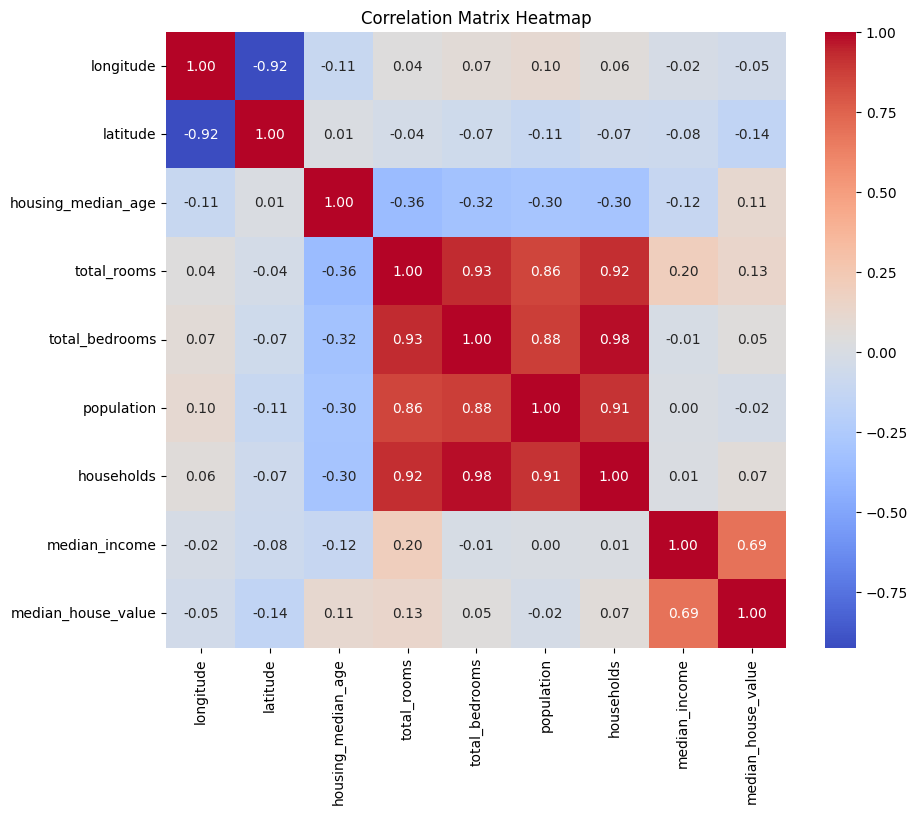

8. First 5 Rows of the Dataset:
   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY   

9. Distribution of 'median_house_value':


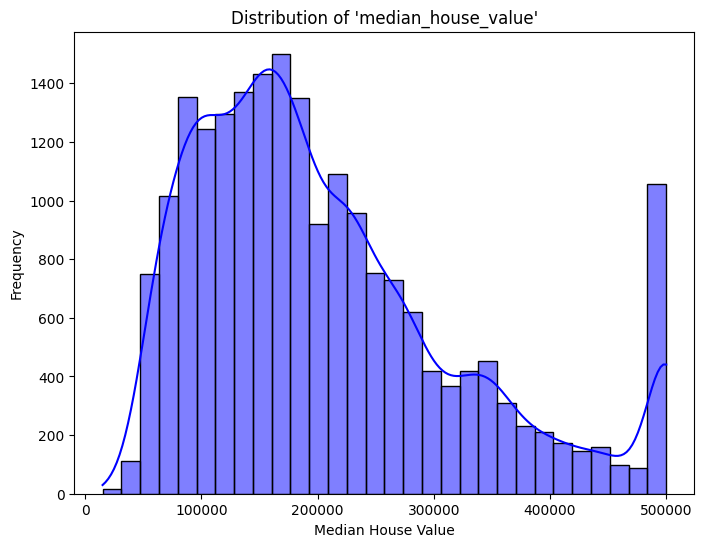

10. Box Plot for 'median_income':


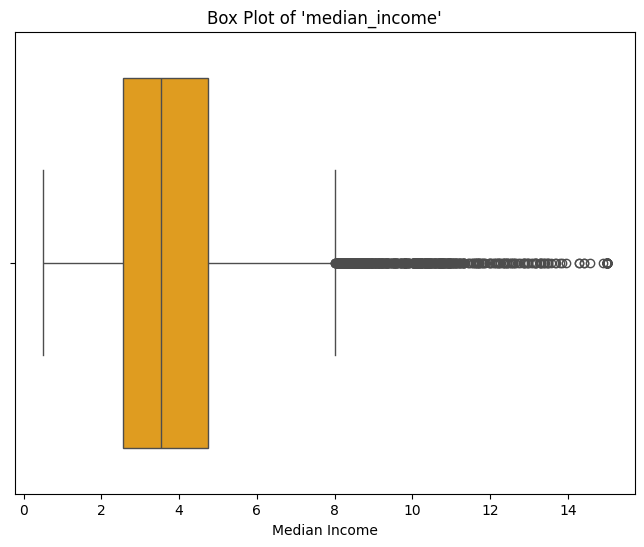

<ipython-input-24-cafd3a6418ce>:87: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[numeric_columns] = X[numeric_columns].fillna(X[numeric_columns].mean())



Model Evaluation:

Mean Absolute Error (MAE): 50649.91
Mean Squared Error (MSE): 4902277043.85
Root Mean Squared Error (RMSE): 70016.26
R-squared (R2): 0.63


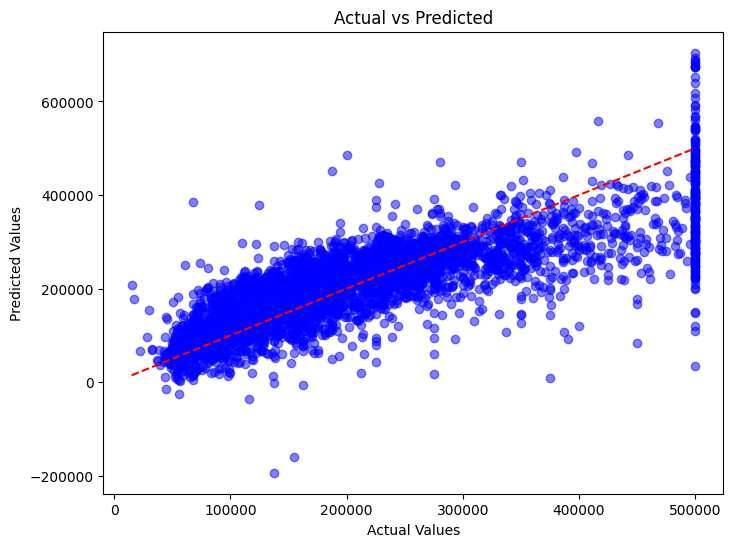

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

# Load dataset
def load_data(file_path):
    return pd.read_csv("/content/housing.csv")

# Explore data
def explore_data(data):
    print("Exploring the dataset in 10 different ways:\n")

    # 1. Dataset shape
    print("1. Dataset Shape:")
    print(f"Rows: {data.shape[0]}, Columns: {data.shape[1]}\n")

    # 2. Data types of columns
    print("2. Data Types of Columns:")
    print(data.dtypes, "\n")

    # 3. Summary statistics for numeric columns
    print("3. Summary Statistics:")
    print(data.describe(), "\n")

    # 4. Count of missing values
    print("4. Missing Values Per Column:")
    print(data.isnull().sum(), "\n")

    # 5. Unique values in categorical column
    print("5. Unique Values in 'ocean_proximity':")
    print(data['ocean_proximity'].unique(), "\n")

    # 6. Value counts for a categorical column
    print("6. Value Counts for 'ocean_proximity':")
    print(data['ocean_proximity'].value_counts(), "\n")

    # 7. Correlation matrix (numeric columns only)
    print("7. Correlation Matrix (Numeric Columns):")
    numeric_data = data.select_dtypes(include=['float64', 'int64'])
    correlation_matrix = numeric_data.corr()
    print(correlation_matrix, "\n")

    # Heatmap for correlation matrix
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
    plt.title("Correlation Matrix Heatmap")
    plt.show()

    # 8. Head of the dataset
    print("8. First 5 Rows of the Dataset:")
    print(data.head(), "\n")

    # 9. Distribution of 'median_house_value'
    print("9. Distribution of 'median_house_value':")
    plt.figure(figsize=(8, 6))
    sns.histplot(data['median_house_value'], kde=True, bins=30, color='blue')
    plt.title("Distribution of 'median_house_value'")
    plt.xlabel("Median House Value")
    plt.ylabel("Frequency")
    plt.show()

    # 10. Boxplot for 'median_income'
    print("10. Box Plot for 'median_income':")
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=data['median_income'], color='orange')
    plt.title("Box Plot of 'median_income'")
    plt.xlabel("Median Income")
    plt.show()

# Perform Linear Regression
def perform_linear_regression(data):
    # Handle categorical features (e.g., 'ocean_proximity')
    categorical_columns = ['ocean_proximity']
    numeric_columns = data.columns.drop(['median_house_value'] + categorical_columns)

    # Separate features and target variable
    X = data[numeric_columns.union(categorical_columns)]
    y = data['median_house_value']

    # Fill missing values in numeric columns
    X[numeric_columns] = X[numeric_columns].fillna(X[numeric_columns].mean())

    # One-hot encode categorical features
    ct = ColumnTransformer(
        transformers=[('cat', OneHotEncoder(), categorical_columns)],
        remainder='passthrough'
    )
    X_encoded = ct.fit_transform(X)

    # Split the dataset into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

    # Scale the features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Train the Linear Regression model
    model = LinearRegression()
    model.fit(X_train_scaled, y_train)

    # Make predictions
    y_pred = model.predict(X_test_scaled)

    # Evaluate the model
    print("\nModel Evaluation:\n")
    print(f"Mean Absolute Error (MAE): {mean_absolute_error(y_test, y_pred):.2f}")
    print(f"Mean Squared Error (MSE): {mean_squared_error(y_test, y_pred):.2f}")
    print(f"Root Mean Squared Error (RMSE): {np.sqrt(mean_squared_error(y_test, y_pred)):.2f}")
    print(f"R-squared (R2): {r2_score(y_test, y_pred):.2f}")

    # Scatter plot: Actual vs Predicted
    plt.figure(figsize=(8, 6))
    plt.scatter(y_test, y_pred, alpha=0.5, color='blue')
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
    plt.title('Actual vs Predicted')
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.show()

# Main script
file_path = "cal_housing.csv"  # Replace with the path to your dataset
data = load_data(file_path)

# Explore the dataset
explore_data(data)

# Perform Linear Regression
perform_linear_regression(data)
